In [7]:
source('../1.Upscaling/funciones_upscaling.r')


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded


Get the latest stable version (1.6.3) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



In [2]:
##Creamos el directorio para incluir upscaling de fba
ruta <- "../1.Upscaling"
nombre_directorio <- "upscaling_fba"
if (!dir.exists(file.path(ruta, nombre_directorio))) {
  dir.create(file.path(ruta, nombre_directorio))
    cat("El directorio",nombre_directorio, "ha sido creado.")
} else {
  # El directorio ya existe
  cat("El directorio",nombre_directorio, "ya existe, por lo que no ha sido creado.")
}
#Creamos el directorio para incluir las áreas por pixel
ruta <- "../1.Upscaling"
nombre_directorio <- "superficiePorPixel"
if (!dir.exists(file.path(ruta, nombre_directorio))) {
  dir.create(file.path(ruta, nombre_directorio))
    cat("\nEl directorio",nombre_directorio, "ha sido creado.")
} else {
  # El directorio ya existe
  cat("\nEl directorio",nombre_directorio, "ya existe, por lo que no ha sido creado.")
}

#Creamos el directorio para incluir la superficie de area quemable
ruta <- "../1.Upscaling"
nombre_directorio <- "superficieAreaQuemable"
if (!dir.exists(file.path(ruta, nombre_directorio))) {
  dir.create(file.path(ruta, nombre_directorio))
    cat("\nEl directorio",nombre_directorio, "ha sido creado.")
} else {
  # El directorio ya existe
  cat("\nEl directorio",nombre_directorio, "ya existe, por lo que no ha sido creado.")
}

El directorio upscaling_fba ya existe, por lo que no ha sido creado.
El directorio superficiePorPixel ya existe, por lo que no ha sido creado.
El directorio superficieAreaQuemable ya existe, por lo que no ha sido creado.

In [4]:
load('../0.Data/MODIS_OLCI_fba_200101-202205.Rdata', verbose = TRUE)
load('../0.Data/MODIS_OLCI_ba_200101-202205.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_05.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_1.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_2.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_3.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_4.Rdata', verbose=TRUE)
load('../1.Upscaling/upscaling_ba/ba_grid_5.Rdata', verbose=TRUE)

Loading objects:
  fba.merge
Loading objects:
  ba.merge
Loading objects:
  ba.mergeGrid0.5
Loading objects:
  ba.mergeGrid1
Loading objects:
  ba.mergeGrid2
Loading objects:
  ba.mergeGrid3
Loading objects:
  ba.mergeGrid4
Loading objects:
  ba.mergeGrid5


In [5]:
areasPixeles_025 <- func.superficiePorPixel_coordCartes(ba.merge,0.25)
areasPixeles_05 <- func.superficiePorPixel_coordCartes(ba.mergeGrid0.5,0.5)
areasPixeles_1 <- func.superficiePorPixel_coordCartes(ba.mergeGrid1,1)
areasPixeles_2 <- func.superficiePorPixel_coordCartes(ba.mergeGrid2,2)
areasPixeles_3 <- func.superficiePorPixel_coordCartes(ba.mergeGrid3,3)
areasPixeles_4 <- func.superficiePorPixel_coordCartes(ba.mergeGrid4,4)
areasPixeles_5 <- func.superficiePorPixel_coordCartes(ba.mergeGrid5,5)

#Para evitar problemas de espacio eliminadmos vairables:
rm(ba.merge, ba.mergeGrid0.5, ba.mergeGrid1, ba.mergeGrid2, ba.mergeGrid3, ba.mergeGrid4, ba.mergeGrid5)

In [10]:
save(areasPixeles_05, file ='superficiePorPixel/areasPixeles_05.Rdata')
save(areasPixeles_1, file ='superficiePorPixel/areasPixeles_1.Rdata')
save(areasPixeles_2, file ='superficiePorPixel/areasPixeles_2.Rdata')
save(areasPixeles_3, file ='superficiePorPixel/areasPixeles_3.Rdata')
save(areasPixeles_4, file ='superficiePorPixel/areasPixeles_4.Rdata')
save(areasPixeles_5, file ='superficiePorPixel/areasPixeles_5.Rdata')

In [11]:
superficieAreaQuemable_025 <- func.calcularSuperficieAreaQuemable(grid = fba.merge, areasPixeles = areasPixeles_025)

In [12]:
superficieAreaQuemable_05 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 2, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_1 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 4, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_2 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 8, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_3 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 12, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_4 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 16, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_5 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 20, aggr.fun = list(FUN = sum, na.rm = TRUE))

In [13]:
save(superficieAreaQuemable_05, file ='superficieAreaQuemable/superficieAreaQuemable_05.Rdata')
save(superficieAreaQuemable_1, file ='superficieAreaQuemable/superficieAreaQuemable_1.Rdata')
save(superficieAreaQuemable_2, file ='superficieAreaQuemable/superficieAreaQuemable_2.Rdata')
save(superficieAreaQuemable_3, file ='superficieAreaQuemable/superficieAreaQuemable_3.Rdata')
save(superficieAreaQuemable_4, file ='superficieAreaQuemable/superficieAreaQuemable_4.Rdata')
save(superficieAreaQuemable_5, file ='superficieAreaQuemable/superficieAreaQuemable_5.Rdata')

In [14]:
fba_05 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_05, areasPixeles = areasPixeles_05, FinalVarName = "fba_grid_05.Rdata")
fba_1 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_1, areasPixeles = areasPixeles_1, FinalVarName = "fba_grid_1.Rdata")
fba_2 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_2, areasPixeles = areasPixeles_2, FinalVarName = "fba_grid_2.Rdata")
fba_3 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_3, areasPixeles = areasPixeles_3, FinalVarName = "fba_grid_3.Rdata")
fba_4 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_4, areasPixeles = areasPixeles_4, FinalVarName = "fba_grid_4.Rdata")
fba_5 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_5, areasPixeles = areasPixeles_5, FinalVarName = "fba_grid_5.Rdata")

In [15]:
save(fba_05, file ="upscaling_fba/ fba_grid_05.Rdata")
save(fba_1, file ="upscaling_fba/ fba_grid_1.Rdata")
save(fba_2, file ="upscaling_fba/ fba_grid_2.Rdata")
save(fba_3, file ="upscaling_fba/ fba_grid_3.Rdata")
save(fba_4, file ="upscaling_fba/ fba_grid_4.Rdata")
save(fba_5, file ="upscaling_fba/ fba_grid_5.Rdata")

In [16]:
fba_025_clim <- climatology(fba.merge)
fba_05_clim <- climatology(fba_05)
fba_1_clim <- climatology(fba_1)
fba_2_clim <- climatology(fba_2)
fba_3_clim <- climatology(fba_3)
fba_4_clim <- climatology(fba_4)
fba_5_clim <- climatology(fba_5)

[2023-07-18 17:33:43] - Computing climatology...

[2023-07-18 17:34:21] - Done.

[2023-07-18 17:34:23] - Computing climatology...

[2023-07-18 17:34:34] - Done.

[2023-07-18 17:34:35] - Computing climatology...

[2023-07-18 17:34:37] - Done.

[2023-07-18 17:34:37] - Computing climatology...

[2023-07-18 17:34:37] - Done.

[2023-07-18 17:34:38] - Computing climatology...

[2023-07-18 17:34:38] - Done.

[2023-07-18 17:34:38] - Computing climatology...

[2023-07-18 17:34:38] - Done.

[2023-07-18 17:34:38] - Computing climatology...

[2023-07-18 17:34:38] - Done.



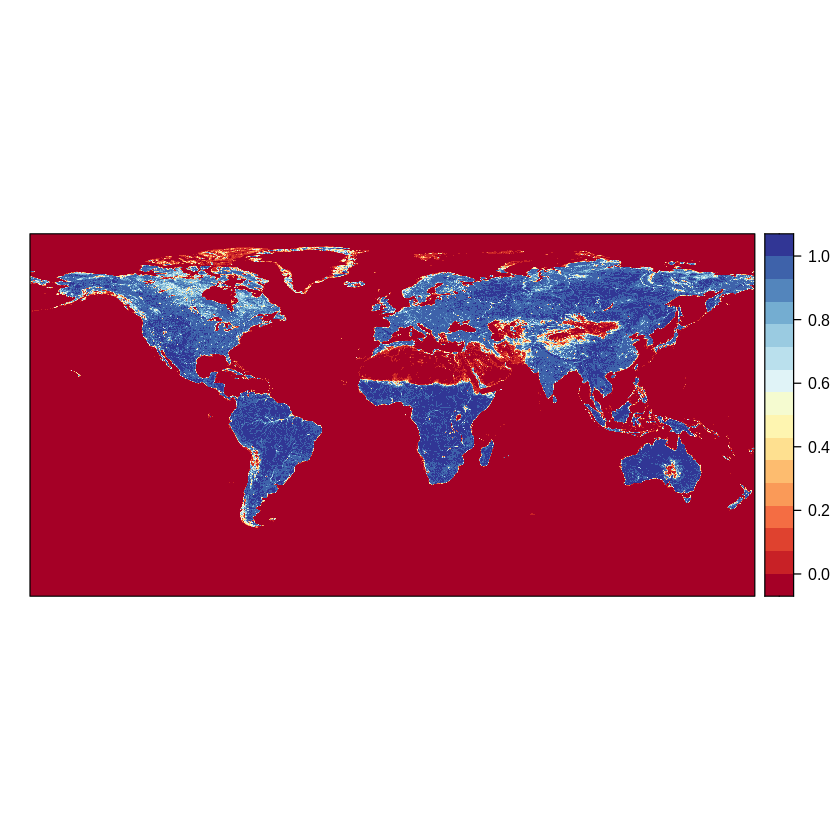

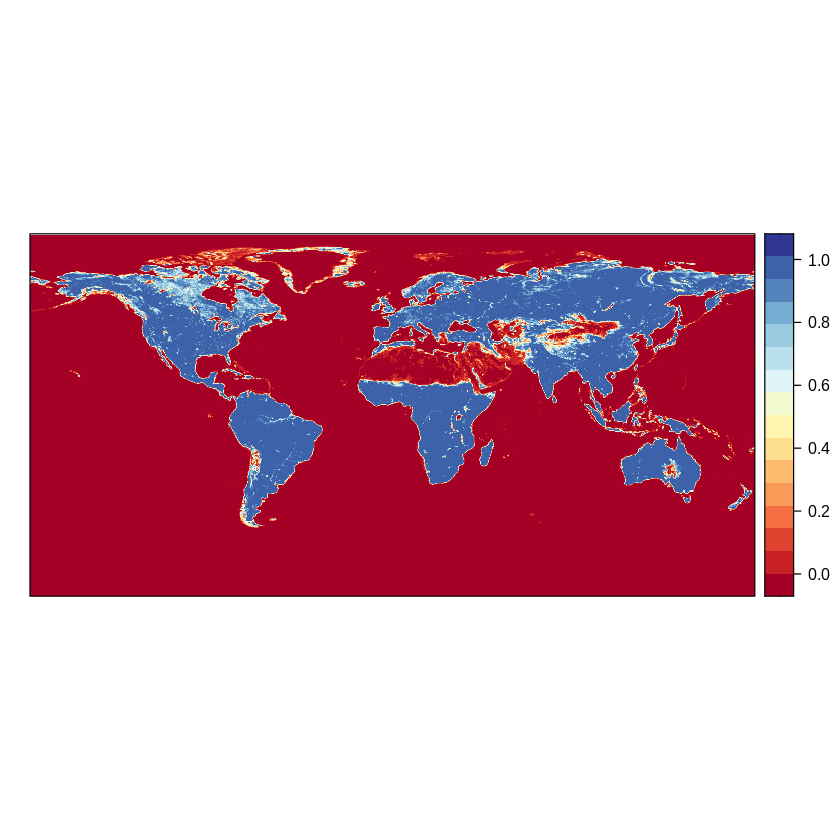

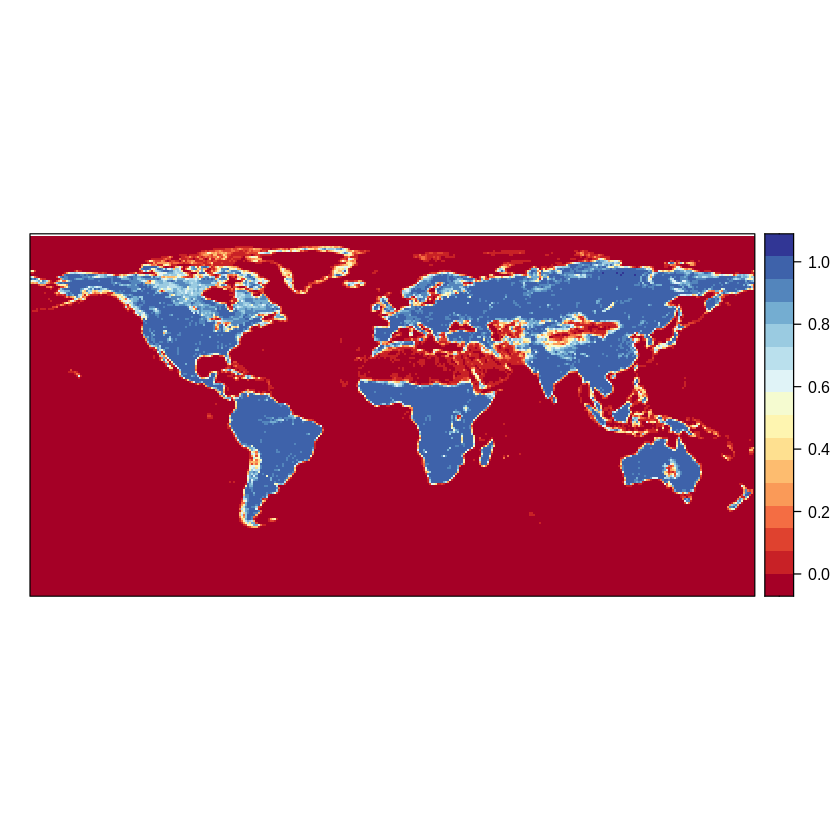

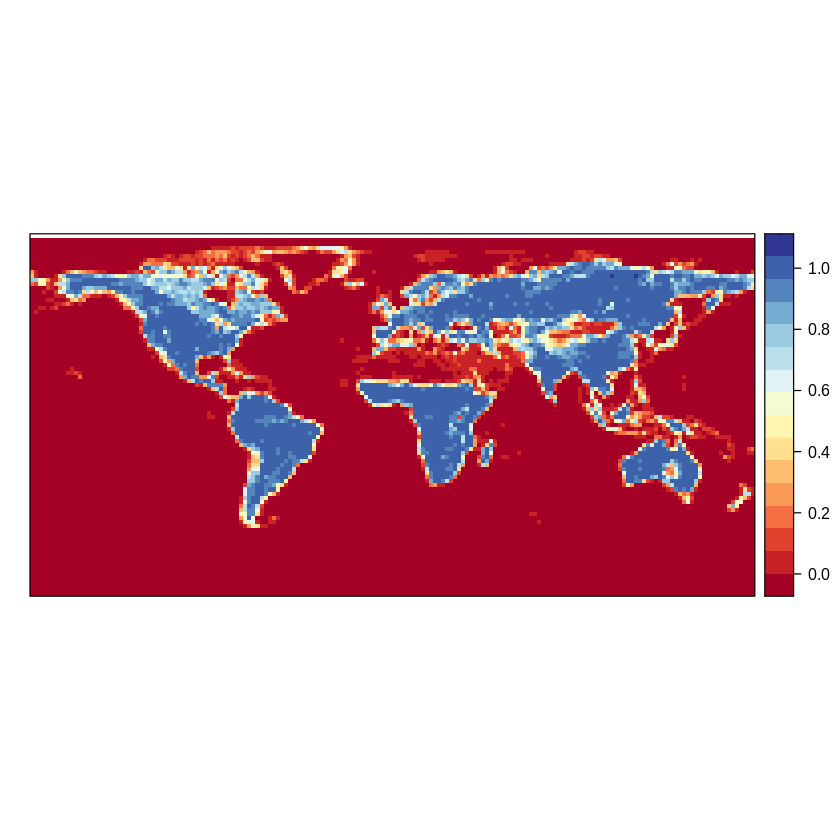

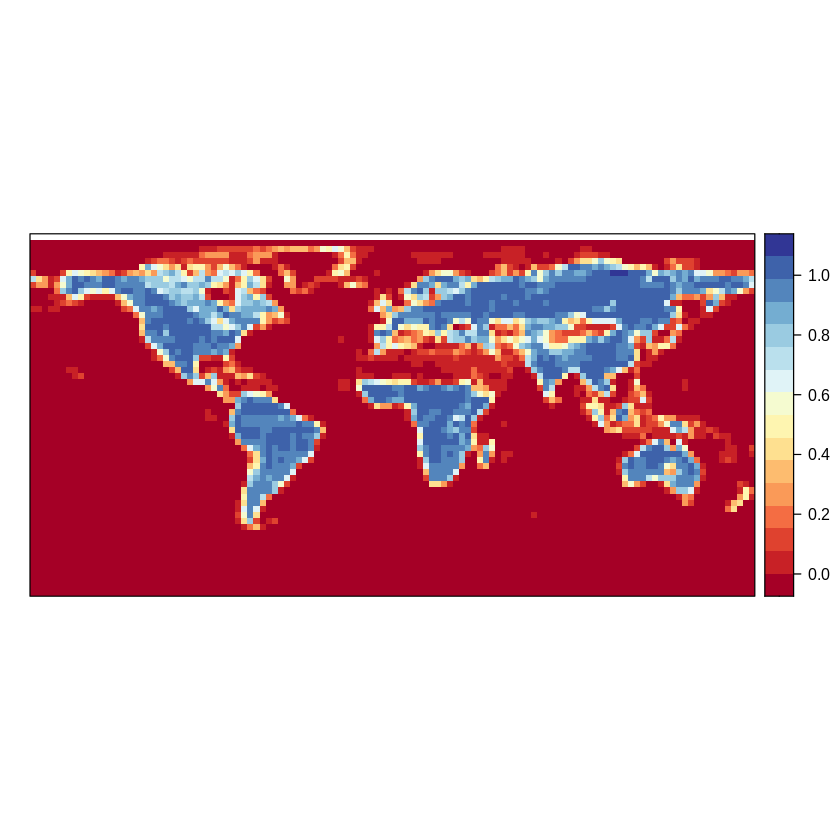

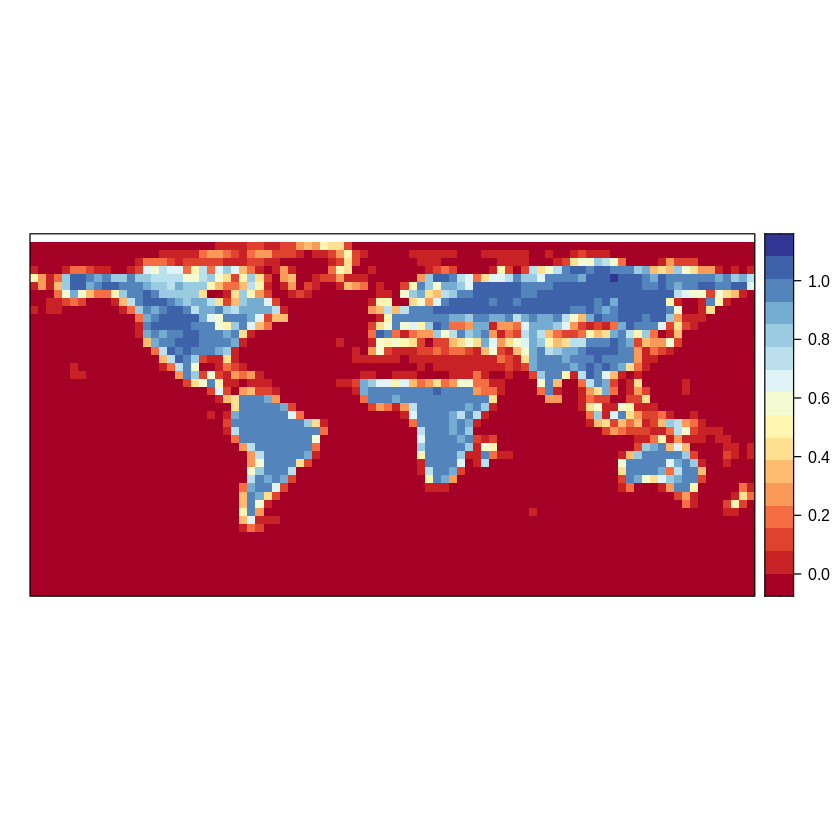

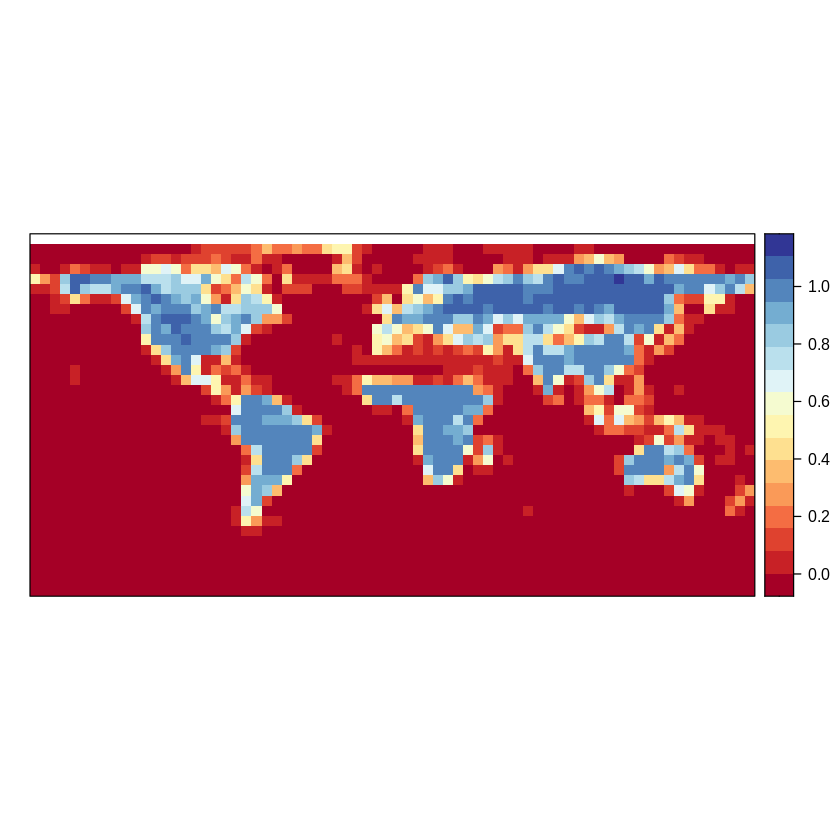

In [17]:
spatialPlot(fba_025_clim)
spatialPlot(fba_05_clim)
spatialPlot(fba_1_clim)
spatialPlot(fba_2_clim)
spatialPlot(fba_3_clim)
spatialPlot(fba_4_clim)
spatialPlot(fba_5_clim)

Guardamos los plots

In [23]:
ruta <- "../1.Upscaling"
nombre_directorio <- "plots"
if (!dir.exists(file.path(ruta, nombre_directorio))) {
  dir.create(file.path(ruta, nombre_directorio))
    cat("El directorio",nombre_directorio, "ha sido creado.")
}

fig_fba_025_clim <- spatialPlot(fba_025_clim, backdrop.theme = 'coastline')
fig_fba_05_clim <- spatialPlot(fba_05_clim, backdrop.theme = 'coastline')
fig_fba_1_clim <- spatialPlot(fba_1_clim, backdrop.theme = 'coastline')
fig_fba_2_clim <- spatialPlot(fba_2_clim, backdrop.theme = 'coastline')
fig_fba_3_clim <- spatialPlot(fba_3_clim, backdrop.theme = 'coastline')
fig_fba_4_clim <- spatialPlot(fba_4_clim, backdrop.theme = 'coastline')
fig_fba_5_clim <- spatialPlot(fba_5_clim, backdrop.theme = 'coastline')

In [24]:
plotname <- "plots/fba_upscaled_clim.pdf"
pdf(plotname)
fig_fba_025_clim
fig_fba_05_clim
fig_fba_1_clim
fig_fba_2_clim
fig_fba_3_clim
fig_fba_4_clim
fig_fba_5_clim
dev.off()

png 
  2

Incluimos grids a 1.5 grados y 2.5 grados

In [32]:
##Upscale de BA
load('../0.Data/MODIS_OLCI_ba_200101-202205.Rdata', verbose=TRUE)
ba.mergeGrid15 <- upscaleGrid(grid = ba.merge, times = 6, aggr.fun = list(FUN = sum, na.rm = TRUE))
ba.mergeGrid25 <- upscaleGrid(grid = ba.merge, times = 10, aggr.fun = list(FUN = sum, na.rm = TRUE))
save(ba.mergeGrid15, file = "upscaling_ba/ba_grid_15.Rdata")
save(ba.mergeGrid25, file = "upscaling_ba/ba_grid_25.Rdata")
print("ba upscaling at 1.5 completed")
print("ba upscaling at 2.5 completed")
### upscale de FBA
areasPixeles_15 <- func.superficiePorPixel_coordCartes(ba.mergeGrid15,1.5)
areasPixeles_25 <- func.superficiePorPixel_coordCartes(ba.mergeGrid25,2.5)
print("areasPixeles at 1.5 completed")
print("areasPixeles at 2.5 completed")
superficieAreaQuemable_15 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 6, aggr.fun = list(FUN = sum, na.rm = TRUE))
superficieAreaQuemable_25 <- upscaleGrid(grid = superficieAreaQuemable_025, times = 10, aggr.fun = list(FUN = sum, na.rm = TRUE))
print("superficieAreaQuemable at 1.5 completed")
print("superficieAreaQuemable at 2.5 completed")
save(superficieAreaQuemable_15, file ='superficieAreaQuemable/superficieAreaQuemable_15.Rdata')
save(superficieAreaQuemable_25, file ='superficieAreaQuemable/superficieAreaQuemable_25.Rdata')
fba_15 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_15, areasPixeles = areasPixeles_15, FinalVarName = "fba_grid_15.Rdata")
fba_25 <- func.calcularFBA_upscaled(superficieAreaQuemable_upscaled = superficieAreaQuemable_25, areasPixeles = areasPixeles_25, FinalVarName = "fba_grid_25.Rdata")
print("fba upscaling at 1.5 completed")
print("fba upscaling at 2.5 completed")
save(fba_15, file ="upscaling_fba/ fba_grid_15.Rdata")
save(fba_25, file ="upscaling_fba/ fba_grid_25.Rdata")

Loading objects:
  ba.merge
[1] "ba upscaling at 1.5 completed"
[1] "ba upscaling at 2.5 completed"
[1] "areasPixeles at 1.5 completed"
[1] "areasPixeles at 2.5 completed"
[1] "superficieAreaQuemable at 1.5 completed"
[1] "superficieAreaQuemable at 2.5 completed"
[1] "fba upscaling at 1.5 completed"
[1] "fba upscaling at 2.5 completed"


[2023-07-24 08:25:45] - Computing climatology...

[2023-07-24 08:25:46] - Done.

[2023-07-24 08:25:46] - Computing climatology...

[2023-07-24 08:25:46] - Done.



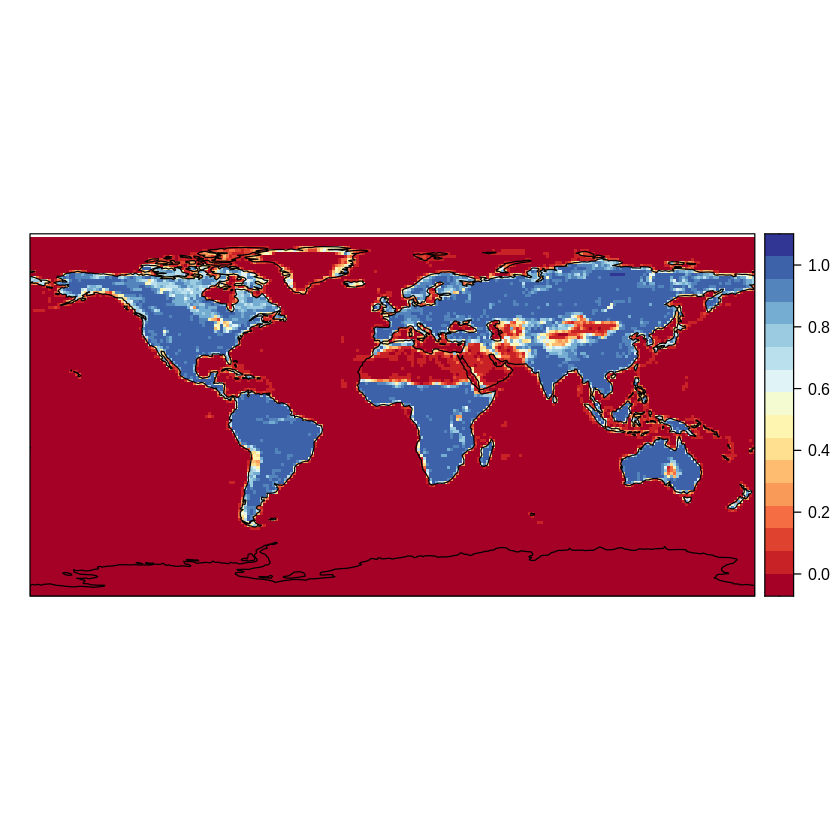

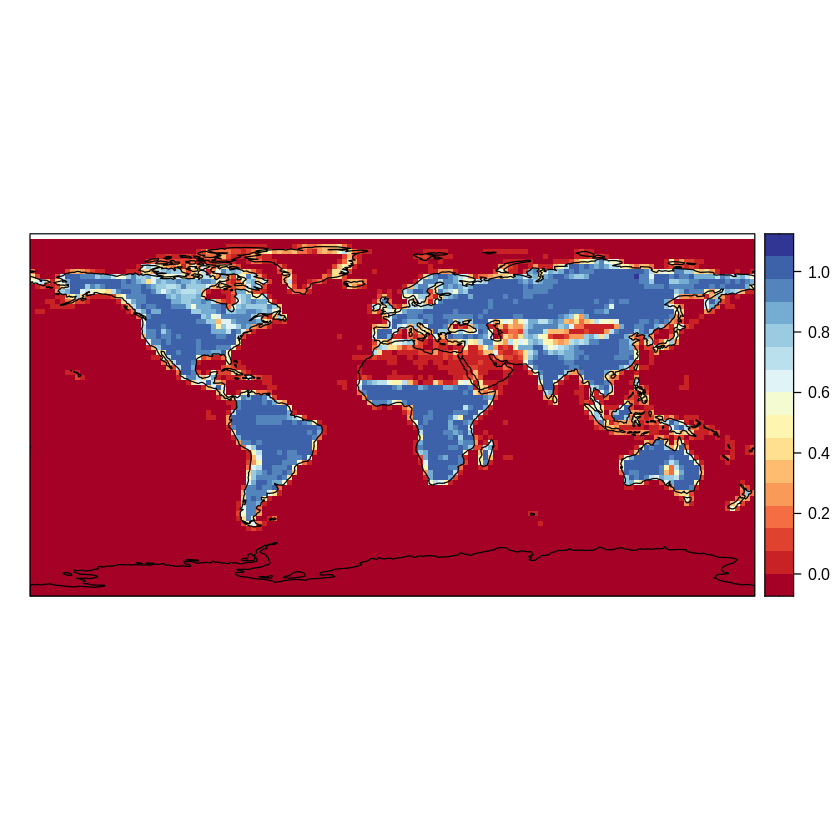

In [33]:
fba_15_clim <- climatology(fba_15)
fba_25_clim <- climatology(fba_25)
fig_fba_15_clim <- spatialPlot(fba_15_clim, backdrop.theme = 'coastline')
fig_fba_25_clim <- spatialPlot(fba_25_clim, backdrop.theme = 'coastline')
fig_fba_15_clim
fig_fba_25_clim

In [34]:
plotname <- "plots/fba_upscaled_clim.pdf"
pdf(plotname)
fig_fba_025_clim
fig_fba_05_clim
fig_fba_1_clim
fig_fba_15_clim
fig_fba_2_clim
fig_fba_25_clim
fig_fba_3_clim
fig_fba_4_clim
fig_fba_5_clim
dev.off()

png 
  2

Eliminar pixeles del mar

[2023-09-20 09:08:17] - Computing climatology...

[2023-09-20 09:08:51] - Done.

[2023-09-20 09:08:52] - Computing climatology...

[2023-09-20 09:09:01] - Done.

[2023-09-20 09:09:01] - Computing climatology...

[2023-09-20 09:09:03] - Done.

[2023-09-20 09:09:03] - Computing climatology...

[2023-09-20 09:09:04] - Done.

[2023-09-20 09:09:04] - Computing climatology...

[2023-09-20 09:09:04] - Done.

[2023-09-20 09:09:05] - Computing climatology...

[2023-09-20 09:09:05] - Done.

[2023-09-20 09:09:05] - Computing climatology...

[2023-09-20 09:09:06] - Done.

[2023-09-20 09:09:06] - Computing climatology...

[2023-09-20 09:09:06] - Done.

[2023-09-20 09:09:06] - Computing climatology...

[2023-09-20 09:09:06] - Done.



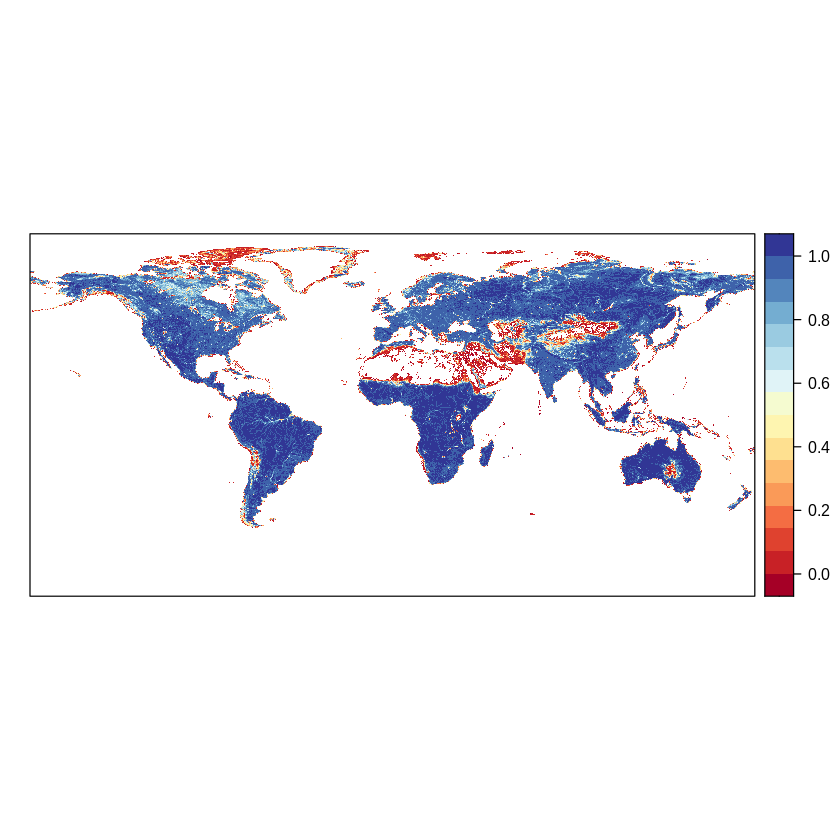

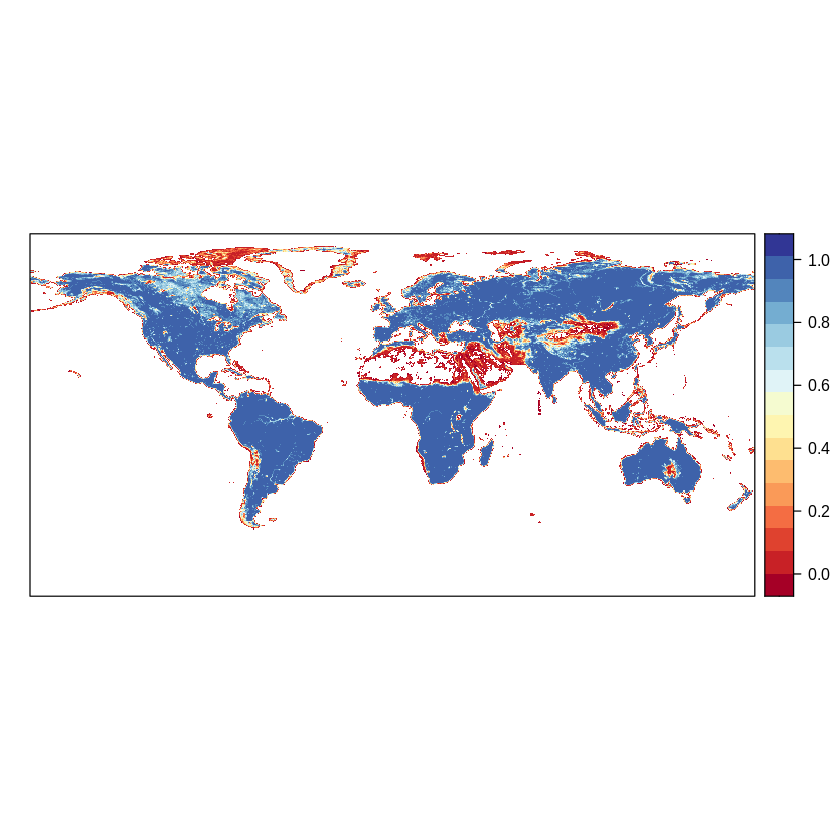

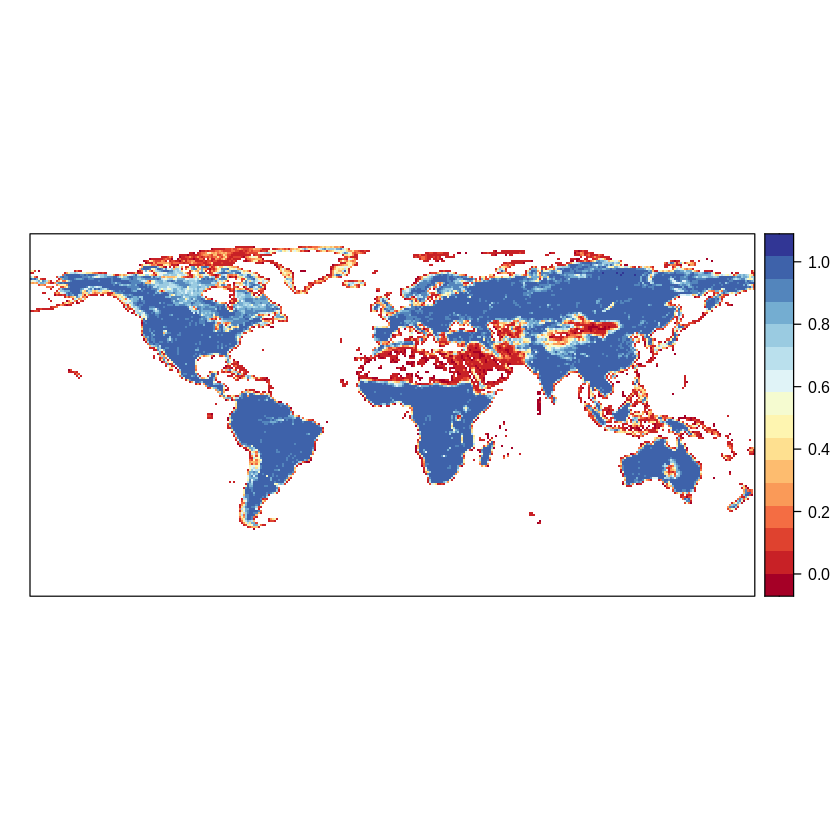

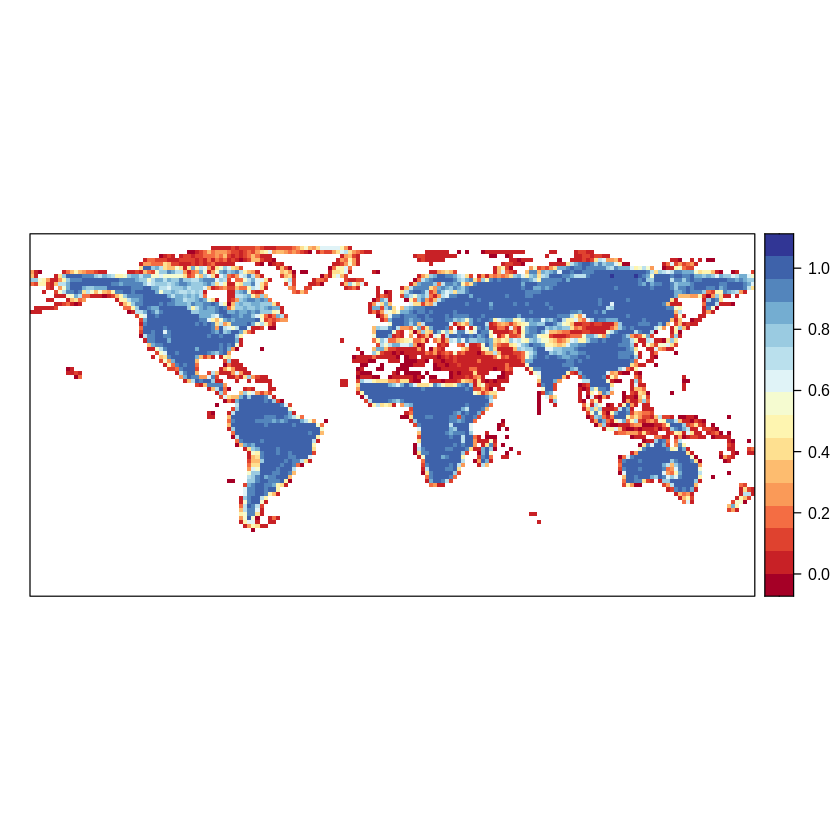

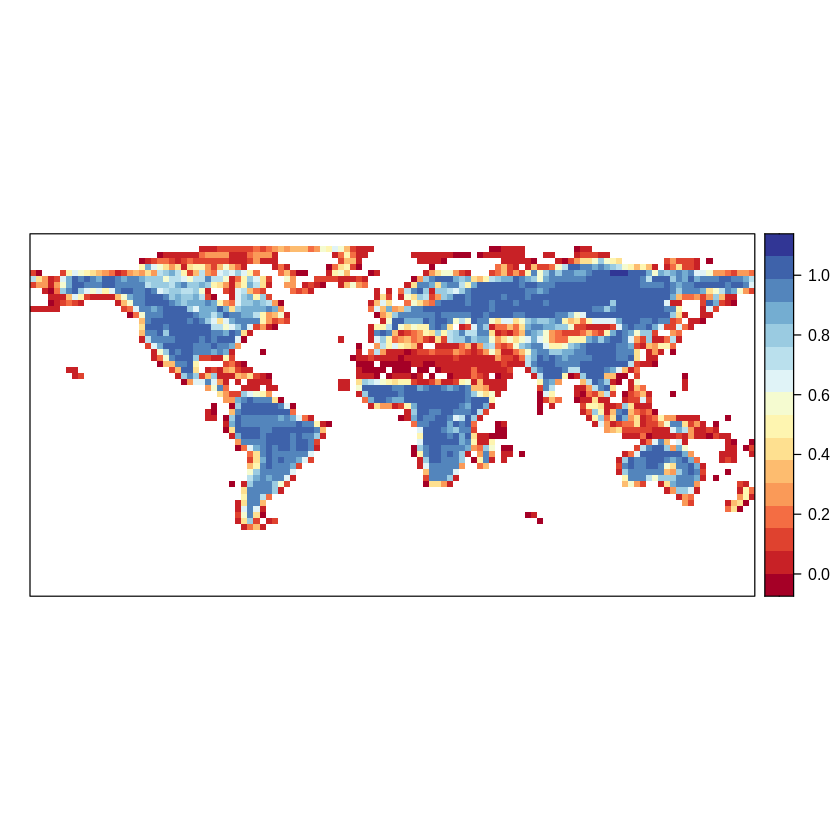

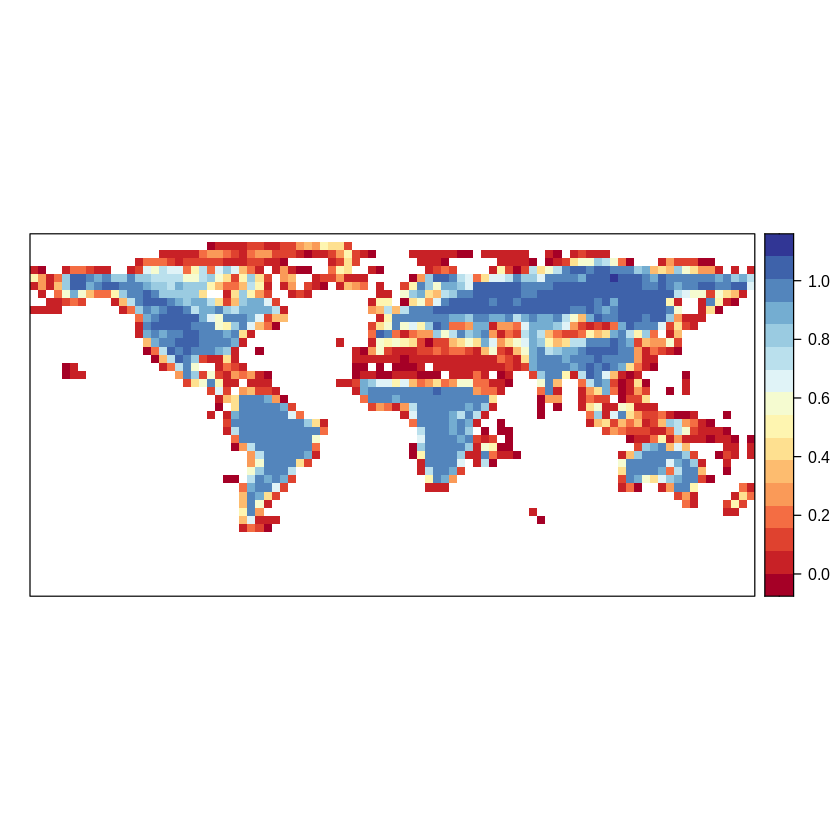

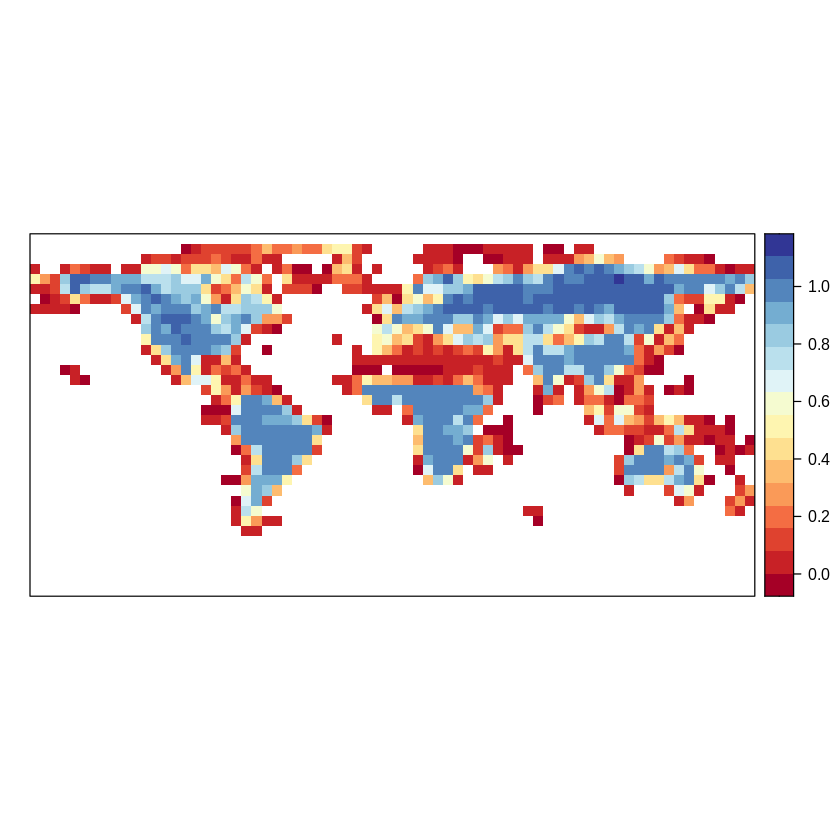

In [56]:
fba_025 <- get(load('../0.Data/MODIS_OLCI_fba_200101-202205.Rdata'))
fba_05 <-get(load('upscaling_fba/ fba_grid_05.Rdata'))
fba_1 <- get(load('upscaling_fba/ fba_grid_1.Rdata'))
fba_15 <- get(load('upscaling_fba/ fba_grid_15.Rdata'))
fba_2 <- get(load('upscaling_fba/ fba_grid_2.Rdata'))
fba_25 <- get(load('upscaling_fba/ fba_grid_25.Rdata'))
fba_3 <- get(load('upscaling_fba/ fba_grid_3.Rdata'))
fba_4 <- get(load('upscaling_fba/ fba_grid_4.Rdata'))
fba_5 <- get(load('upscaling_fba/ fba_grid_5.Rdata'))

fba_025$Data <- replace(fba_025$Data, fba_025$Data == 0, NaN)
fba_05$Data <- replace(fba_05$Data, fba_05$Data == 0, NaN)
fba_1$Data <- replace(fba_1$Data, fba_1$Data == 0, NaN)
fba_15$Data <- replace(fba_15$Data, fba_15$Data == 0, NaN)
fba_2$Data <- replace(fba_2$Data, fba_2$Data == 0, NaN)
fba_25$Data <- replace(fba_25$Data, fba_25$Data == 0, NaN)
fba_3$Data <- replace(fba_3$Data, fba_3$Data == 0, NaN)
fba_4$Data <- replace(fba_4$Data, fba_4$Data == 0, NaN)
fba_5$Data <- replace(fba_5$Data, fba_5$Data == 0, NaN)



fba_025_clim  <- climatology(fba_025)
fba_05_clim <- climatology(fba_05)
fba_1_clim <- climatology(fba_1)
fba_15_clim <- climatology(fba_15)
fba_2_clim <- climatology(fba_2)
fba_25_clim <- climatology(fba_25)
fba_3_clim <- climatology(fba_3)
fba_4_clim <- climatology(fba_4)
fba_5_clim <- climatology(fba_5)

spatialPlot(fba_025_clim)
spatialPlot(fba_05_clim)
spatialPlot(fba_1_clim)
spatialPlot(fba_2_clim)
spatialPlot(fba_3_clim)
spatialPlot(fba_4_clim)
spatialPlot(fba_5_clim)

In [57]:
ruta <- "../1.Upscaling"
nombre_directorio <- "plots"
if (!dir.exists(file.path(ruta, nombre_directorio))) {
  dir.create(file.path(ruta, nombre_directorio))
    cat("El directorio",nombre_directorio, "ha sido creado.")
}

fig_fba_025_clim <- spatialPlot(fba_025_clim, backdrop.theme = 'coastline')
fig_fba_5_clim <- spatialPlot(fba_5_clim, backdrop.theme = 'coastline')

plotname <- "plots/fba_upscaled_clim_masked.pdf"
pdf(plotname)
fig_fba_025_clim
fig_fba_5_clim
dev.off()

png 
  2

In [59]:
save(fba_025, file ="upscaling_fba_masked/masked_fba_grid_025.Rdata")
save(fba_05, file ="upscaling_fba_masked/masked_fba_grid_05.Rdata")
save(fba_1, file ="upscaling_fba_masked/masked_fba_grid_1.Rdata")
save(fba_15, file ="upscaling_fba_masked/masked_fba_grid_15.Rdata")
save(fba_2, file ="upscaling_fba_masked/masked_fba_grid_2.Rdata")
save(fba_25, file ="upscaling_fba_masked/masked_fba_grid_25.Rdata")
save(fba_3, file ="upscaling_fba_masked/masked_fba_grid_3.Rdata")
save(fba_4, file ="upscaling_fba_masked/masked_fba_grid_4.Rdata")
save(fba_5, file ="upscaling_fba_masked/masked_fba_grid_5.Rdata")